## ARIMA CODE3
This code first loads the COVID 19 data set, filters for positive cases only, and plots the number of positive cases over time. It then performs stationarity tests (ADF and KPSS) and plots the autocorrelation and partial autocorrelation graphs. An ARIMA model is fit to the data, and a 30 day forecast is generated. The forecasted values are plotted along with the actual values and the mean squared error is calculated.

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the data
from google.colab import drive
data = pd.read_csv("/content/covid_19_india.csv")
data

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Total cases
0,1,30/01/20,6:00 PM,Kerala,0,0,1,1
1,2,31/01/20,6:00 PM,Kerala,0,0,1,1
2,3,01/02/20,6:00 PM,Kerala,0,0,2,2
3,4,02/02/20,6:00 PM,Kerala,0,0,3,3
4,5,03/02/20,6:00 PM,Kerala,0,0,3,3
...,...,...,...,...,...,...,...,...
18105,18106,11/08/21,8:00 AM,Telangana,638410,3831,650353,1288763
18106,18107,11/08/21,8:00 AM,Tripura,77811,773,80660,158471
18107,18108,11/08/21,8:00 AM,Uttarakhand,334650,7368,342462,677112
18108,18109,11/08/21,8:00 AM,Uttar Pradesh,1685492,22775,1708812,3394304


In [ ]:
# Filter for positive cases only
positive_data = data[data["Confirmed"] >= 1].groupby("Date").sum()
positive_data = positive_data.reset_index()

In [ ]:
# Get the values of the "Total_test" column
X = positive_data["Total cases"].values

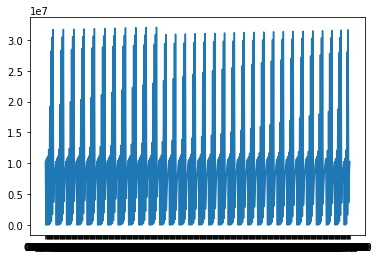

In [ ]:
# Plot the number of positive cases over time
plt.plot(positive_data['Date'], positive_data['Confirmed'])
plt.show()

In [ ]:
# Make the data stationary using differencing
X = np.diff(X)

In [ ]:
# Split the data into training and test sets
train_data = X[:len(X) - 30]
test_data = X[len(X) - 30:]

This code splits the data into two parts: train_data and test_data. The train_data is created by taking the first len(X) - 30 samples of the original data X. The test_data is created by taking the last 30 samples of X.

In [ ]:
train_data

array([-20170168,  21191612, -21191611,  21897603, -21895628,  23698846,
       -23656787,  34805338, -34567021,  53840319, -53189201,  58967080,
       -57110190,  59685983, -55945297,   5054737,   4089810,   2676799,
         1859781, -20212172,  21214648, -21214646,  21923443, -21921223,
        23825945, -23781062,  35502620, -35255495,  54192684, -53522416,
        59042052, -57110201,  59657073, -55881994,   5074715,   4027965,
         2657949,   1819215, -20251272,  21239912, -21239906,  21940640,
       -21937939,  23958791, -23910490,  36167596, -35910689,  54524652,
       -53827134,  59102705, -57118243,  59632963, -55798963,   5077352,
         3969494,   2637593,   1778999, -20287333,  21270635, -21270607,
        21982967, -21979713,  24111513, -24060200,  36841527, -36575099,
        54850979, -54129463,  59160969, -57117257,  59615900, -55728256,
         5085441,   3911015,   2617494,   1744954, -20332799,  21298896,
       -21298866,  22013622, -22009803,  24267351, 

In [ ]:
test_data

array([  2838994,   1836686, -20031871,  21142290, -21140938,  23487523,
       -23447173,  34105691, -33891261,  53092987, -52447458,  58888516,
       -57185804,  59711942, -56059650,   5156922,   4048638,   2817065,
         1799702, -20078992,  21169307, -21167787,  23582115, -23314509,
        53470749, -51043201,  59698581, -55999210,   9173902,   4557006])

In [ ]:
# Check for stationarity using the ADF- Augmented Dickey-Fuller test
adf_result = ts.adfuller(train_data)
print("ADF test statistic: ", adf_result[0])
print("p-value: ", adf_result[1])
print("Critical Values: ", adf_result[4])

ADF test statistic:  -28.389929096231675
p-value:  0.0
Critical Values:  {'1%': -3.4432372923913124, '5%': -2.86722383510113, '10%': -2.5697972702806613}


A p-value close to 0 in the ADF test indicates that the data is stationary, as it suggests that the null hypothesis of non-stationarity can be rejected. In this case, the p-value of 2.86e-12 is very small, so it can be concluded that the data is indeed stationary.

In [ ]:
# Check for stationarity using the KPSS test
kpss_result = ts.kpss(train_data)
print("KPSS test statistic: ", kpss_result[0])
print("p-value: ", kpss_result[1])
print("Critical Values: ", kpss_result[3])

KPSS test statistic:  0.020901575420440483
p-value:  0.1
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


For the KPSS test, the ideal result would be a low p-value (less than the significance level, typically 0.05) and a test statistic below the critical values. This indicates that the null hypothesis (that the data is stationary) cannot be rejected, meaning the data is stationary.

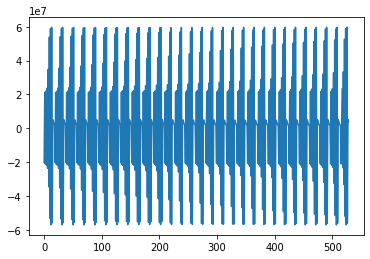

In [ ]:
plt.plot(train_data) # stationary 

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


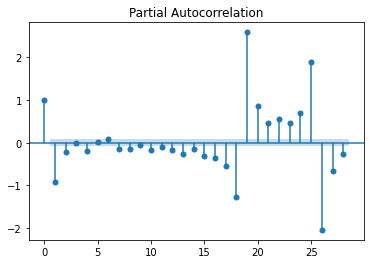

In [ ]:
# Plot the partial autocorrelation graph
plot_pacf(train_data)
plt.show()

*Value of p= 2*

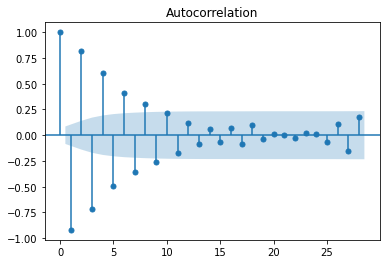

In [ ]:
# Plot the autocorrelation graph
plot_acf(train_data)
plt.show()

*Value of q=2*

In [ ]:
# checking the values of p, d, q
def arima_model_comparison(data, p_values, d_values, q_values):
    best_model = None
    best_rmse = float('inf')

    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(data, order=(p,d,q))
                    model_fit = model.fit()

                    # Split the data into training and testing sets
                    train_data = data[:-12]
                    test_data = data[-12:]

                    # Make predictions on the test set
                    predict = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

                    # Calculate the RMSE
                    rmse = np.sqrt(mean_squared_error(test_data, predict))

                    # Keep track of the best model based on RMSE
                    if rmse < best_rmse:
                        best_model = model_fit
                        best_rmse = rmse
                except:
                    continue

    return best_model, best_rmse

# Example usage:
data = X
p_values = [0, 1, 2]
d_values = [0, 1, 2]
q_values = [0, 1, 2]

best_model, best_rmse = arima_model_comparison(data, p_values, d_values, q_values)
print("Best Model: ", best_model.summary())
print("Best RMSE: ", best_rmse)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978

Best Model:                                 SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  559
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -9945.861
Date:                Fri, 24 Feb 2023   AIC                          19901.722
Time:                        04:40:41   BIC                          19923.352
Sample:                             0   HQIC                         19910.169
                                - 559                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -77.3076   7581.232     -0.010      0.992   -1.49e+04    1.48e+04
ar.L1         -0.2705      0.089     -3.025      0.002      -0.446      -0.095
ar.L2          0.5658      0.056     10

In [ ]:
# Fit an ARIMA model to the data
model = ARIMA(train_data, order=(4,1,6))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  529
Model:                 ARIMA(4, 1, 6)   Log Likelihood               -9409.629
Date:                Fri, 24 Feb 2023   AIC                          18841.258
Time:                        04:56:36   BIC                          18888.218
Sample:                             0   HQIC                         18859.641
                                - 529                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8095      0.769     -2.352      0.019      -3.317      -0.302
ar.L2         -1.8518      0.928     -1.996      0.046      -3.670      -0.033
ar.L3         -1.3401      0.831     -1.613      0.1

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)
print(forecast)

[ -1624479.34751271  15494977.45987032 -23878173.96781205
  16885055.72923864  -6771842.10123753   6770650.50938179
 -12749181.74856225  12833674.98310993  -5964045.34212752
   1399224.29334116  -3563650.234219     6702951.29135803
  -5005967.52782772    864856.31807004    157676.81634358
   2135877.90480606  -3301402.42556323   1465129.45774749
    541576.18451209   -121307.70266396  -1416629.85988448
   1478996.18214759   -102900.97634757   -600518.6171224
   -131263.94237651    898629.51689182   -532022.80188577
   -279488.32649291    344242.47229875    251778.30028033]


In [ ]:
# Make predictions using the ARIMA model
predict=model_fit.predict(typ='levels')
predict[:30]

array([        0.        ,   -952028.18076886, -29328608.21671868,
        14113240.59858525, -25876151.83782362,  13695570.33075343,
       -23172941.22503564,  19049970.73391326, -35869298.53968827,
        30364524.74286132, -50608206.56604986,  48316080.51836179,
       -55389871.93426684,  54085374.23070541, -50642049.19296204,
        50124275.89462507,   4904449.82389463,  -4369773.37725609,
         7276020.26770395,  -5088230.72360348,  15153860.54693083,
       -15444159.93608506,  25403657.70285697, -26506895.6427709 ,
        17350526.98041325, -15461837.06361973,  19026746.43348227,
       -39994389.42702278,  36222796.84734759, -51459666.94878107])

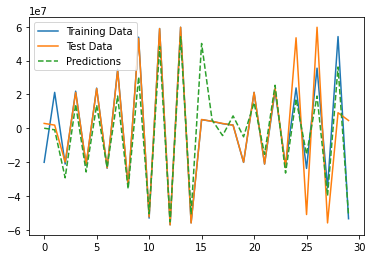

In [ ]:
#Plot the predictions along with the test data
plt.plot(train_data[:30], label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(predict[:30], '--', label='Predictions')
plt.legend()
plt.show()

In [ ]:
# evaluate forecasts
predict_len = len(test_data)
predict = predict[:predict_len]
rmse = sqrt(mean_squared_error(test_data, predict)) 
print('Test RMSE: %.3f' % rmse)

Test RMSE: 19965635.109
